In [1]:
import json

# Load the sift_real_scores.json file
with open("sift_real_scores.json", "r") as f:
    scores = json.load(f)

# Check how many entries exist
total_pairs = len(scores)

# Count how many pairs have score >= 0.7
high_score_pairs = [entry for entry in scores if entry["score"] >= 0.7]
num_high_score = len(high_score_pairs)

# Get the top 10 scores for inspection
top_scores = sorted(scores, key=lambda x: x["score"], reverse=True)[:10]

# Print summary
print(f"Total image pairs in real set: {total_pairs}")
print(f"Number of pairs with score >= 0.7: {num_high_score}")
print("Top 10 scores:")
for entry in top_scores:
    print(f"{entry['img1']} vs {entry['img2']} -> Score: {entry['score']:.4f}")

Total image pairs in real set: 748476
Number of pairs with score >= 0.7: 2
Top 10 scores:
SEAL2021_train_00000239-p.jpg vs SEAL2021_train_00000238-p.jpg -> Score: 0.9772
SEAL2021_train_00000081-p.jpg vs SEAL2021_train_00000080-p.jpg -> Score: 0.9627
SEAL2021_train_00000599-p.jpg vs SEAL2021_train_00000598-p.jpg -> Score: 0.6588
SEAL2021_train_00000512-p.jpg vs SEAL2021_train_00000511-p.jpg -> Score: 0.5378
SEAL2021_train_00000585-p.jpg vs SEAL2021_train_00000408-p.jpg -> Score: 0.4483
SEAL2021_test_000000213_p.jpg vs SEAL2021_test_000000212_p.jpg -> Score: 0.3343
SEAL2021_train_00000722.jpg vs SEAL2021_train_00000702.jpg -> Score: 0.3265
SEAL2021_test_000000212_p.jpg vs SEAL2021_test_000000022_p.jpg -> Score: 0.3210
SEAL2021_train_00000720.jpg vs SEAL2021_train_00000702.jpg -> Score: 0.3200
SEAL2021_val_00000071-p.jpg vs SEAL2021_val_00000070-p.jpg -> Score: 0.3150


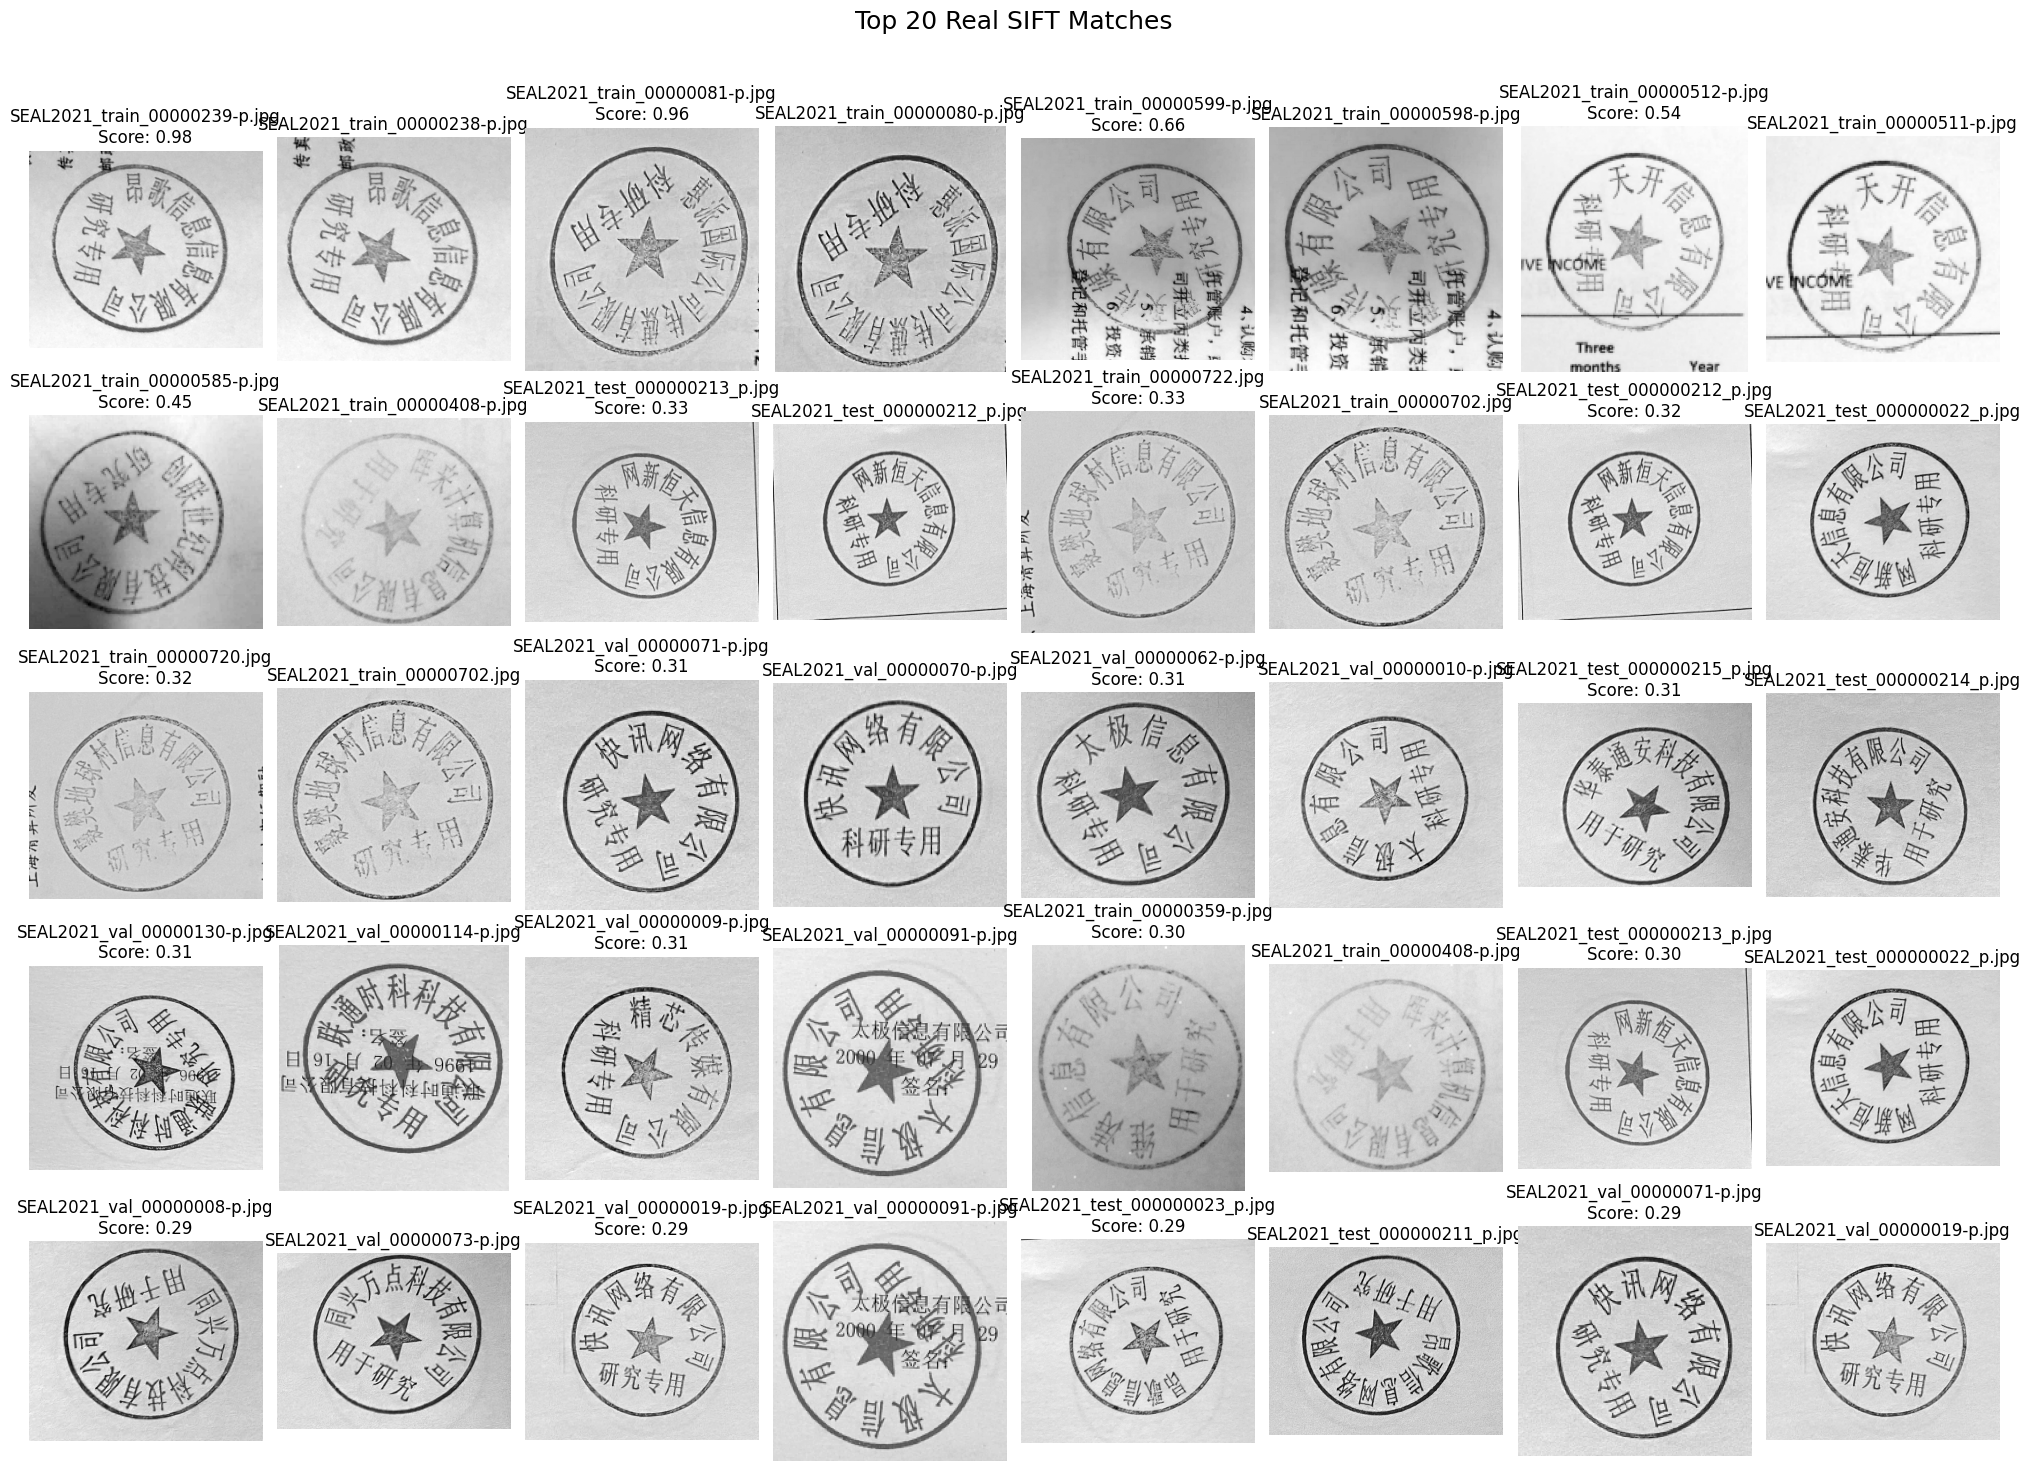

In [1]:
import cv2
import os
import json
import matplotlib.pyplot as plt

# Define the folder containing Real images
real_folder = '/root/CDataset/Real'

# Load image data
def load_images(folder):
    images = {}
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.png')):
            path = os.path.join(folder, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images[filename] = img
    return images

# Load similarity scores from JSON
with open("sift_real_scores.json", "r") as f:
    scores_data = json.load(f)

# Sort and select top 20 pairs
top_20 = sorted(scores_data, key=lambda x: x["score"], reverse=True)[:20]

# Load images
real_images = load_images(real_folder)

# Plot top 20 matches
fig, axes = plt.subplots(5, 8, figsize=(20, 15))
fig.suptitle("Top 20 Real SIFT Matches", fontsize=18)

for idx, match in enumerate(top_20):
    name1 = match["img1"]
    name2 = match["img2"]
    score = match["score"]
    img1 = real_images.get(name1)
    img2 = real_images.get(name2)
    row = idx // 4
    col = (idx % 4) * 2

    if img1 is not None:
        axes[row, col].imshow(img1, cmap='gray')
        axes[row, col].set_title(f"{name1}\nScore: {score:.2f}")
        axes[row, col].axis('off')

    if img2 is not None:
        axes[row, col + 1].imshow(img2, cmap='gray')
        axes[row, col + 1].set_title(f"{name2}")
        axes[row, col + 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("sift_real_top20.png", dpi=200)